Epoch 176: early stopping


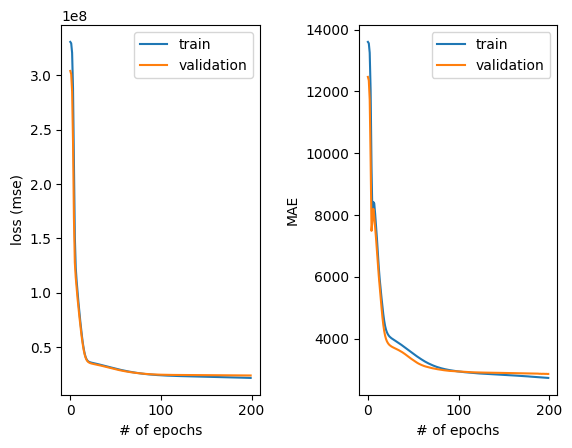

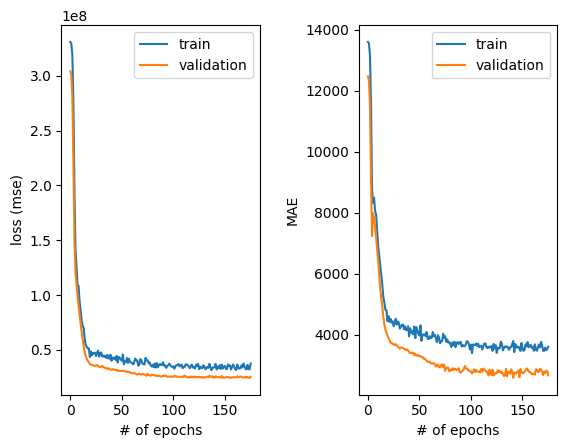

In [3]:
from model_final import features_train, labels_train, fit_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from regularization_plotting import plot
import matplotlib.pyplot as plt

def design_model_dropout(X, learning_rate):
    model = Sequential(name="my_first_model")
    input = tf.keras.Input(shape=(X.shape[1],))
    model.add(input)
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(24, activation='relu'))
    #------your code here!------
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(1))
    opt = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    model.compile(loss='mse', metrics=['mae'], optimizer=opt)
    return model

def design_model_no_dropout(X, learning_rate):
    model = Sequential(name="my_first_model")
    input = layers.InputLayer(shape=(X.shape[1],))
    model.add(input)
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dense(1))
    opt = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    model.compile(loss='mse', metrics=['mae'], optimizer=opt)
    return model
    
#using the early stopping in fit_model
learning_rate = 0.001
num_epochs = 200
#train the model without dropout
history1 = fit_model(design_model_no_dropout(features_train, learning_rate), features_train, labels_train, learning_rate, num_epochs)
#train the model with dropout
history2 = fit_model(design_model_dropout(features_train, learning_rate), features_train, labels_train, learning_rate, num_epochs)

plot(history1)
plot(history2)